In [80]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import t

In [2]:
data = pd.read_csv('Data_Wrangled.csv')
#city = pd.read_csv('City_dummy.csv')
data.drop(columns=['Unnamed: 0','index'], inplace=True)
city.drop(columns=['Unnamed: 0'], inplace=True)
pd.set_option('display.max_rows', 140)

In [3]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 139 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Job_title                           11440 non-null  object 
 1   Salary Estimate                     9765 non-null   object 
 2   Job_Desc                            11440 non-null  object 
 3   Company                             11437 non-null  object 
 4   Location                            9765 non-null   object 
 5   Headquarters                        9161 non-null   object 
 6   Size                                8990 non-null   object 
 7   Founded                             7202 non-null   float64
 8   Type of ownership                   9096 non-null   object 
 9   Industry                            9977 non-null   object 
 10  Sector                              8413 non-null   object 
 11  Revenue                             6567

## Inferential Statistics

Since our data is a sample of a bigger population (we don't have ALL the jobs in the US in our dataset), we should do a littl of Inferential Statistics:

Let's assume our Null Hypothesis to be that these salary averages are NOT representative of our population's, and put Alternative Hypothesis to be that these ARE in fact representative of our populations's.  

#two-sided

Let's look at our response variable distribution:

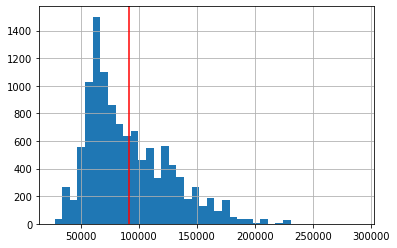

In [79]:
data.Avg_Salary.hist(bins=40);
plt.axvline(data.Avg_Salary.mean(), color='r');

Right skewed, which makes sense as we expect to see more jobs with higher salaries than we do with smaller salaries in Data Science.

Let's calculate t-score and confidence interval:

In [86]:
tscore=t.ppf(q=1-(0.05/2),df=len(data.Avg_Salary)-1) #q=1-0.05/2 ? 
tscore

1.9601713906064324

In [87]:
np.mean(data.Avg_Salary) - tscore*np.std(data.Avg_Salary, ddof=1)/np.sqrt(len(data.Avg_Salary)), np.mean(data.Avg_Salary) + tscore*np.std(data.Avg_Salary, ddof=1)/np.sqrt(len(data.Avg_Salary))

(90469.64579621382, 91767.82081217779)

# ?

`What am I doing wrong? Shouldn't the below distribution be a normal distribution?`

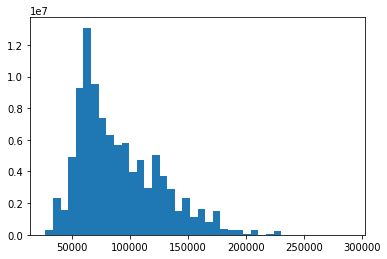

In [76]:
means = pd.DataFrame({'means': np.random.choice(data.Avg_Salary,size=100000)})
plt.hist(np.random.choice(means.means,size=100000000), bins=40);

Let's separate our dataframe into dummies dataframe and 'original' dataframe that will cointain all the information we need to do EDA:

From the .info() method we know that our 'original' dataframe is between column 0 and 16. So let's copy them:

In [4]:
original = data.iloc[:,:17].copy()
original['Avg_Salary'] = data.Avg_Salary
original['Rating'] = data.Rating
original['Employer_Estimate'] = data.Employer_Estimate

In [5]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_title          11440 non-null  object 
 1   Salary Estimate    9765 non-null   object 
 2   Job_Desc           11440 non-null  object 
 3   Company            11437 non-null  object 
 4   Location           9765 non-null   object 
 5   Headquarters       9161 non-null   object 
 6   Size               8990 non-null   object 
 7   Founded            7202 non-null   float64
 8   Type of ownership  9096 non-null   object 
 9   Industry           9977 non-null   object 
 10  Sector             8413 non-null   object 
 11  Revenue            6567 non-null   object 
 12  In_Headquarters    11440 non-null  float64
 13  City               11440 non-null  object 
 14  State              11440 non-null  object 
 15  Min_Salary         11440 non-null  float64
 16  Max_Salary         114

We can see `Company` has 3 missing values that weren't present in our data wrangling. This is because 3 observations had an empty string as the company name ('') and when we read it with pd.read_csv it automatically marked them as missing values. So let's look into `Job_Desc` to see if we can find the names:


In [6]:
original[original.Company.isna()]['Job_Desc']

2544    Job Description\nETL, SQL Queries, Data Modeli...
5203    Job Description\nETL, SQL Queries, Data Modeli...
9424    Description\n\nAre you looking for an opportun...
Name: Job_Desc, dtype: object

In [7]:
original.iloc[2544,2]
original.iloc[5203,2]
original.iloc[9424,2]

"Description\n\nAre you looking for an opportunity where your skills and enthusiasm make a difference and where your voice will be heard? At RingCentral our award-winning environment is high-energy, team-oriented and committed to providing world-class service for its customers. We're the #1 global cloud-based, communications provider, growing at more than 30% annually and we're looking for team-members with an entrepreneurial spark!\nRingCentral fosters career development and provides leadership training, education, workshops, and coaching for all employees. RingCentral promotes a healthy work-life balance by providing catered lunch and breakfast on a daily basis as well as a kitchen stocked with a variety of complimentary beverages and delicious snacks.\nRingCentral is the largest and fastest-growing pure-play provider in this space, market capitalization of over $18 billion and we are very excited to have surpassed our previous goal of a $1 billion annual revenue run-rate ahead of sc

So observations 2544 and 5203 did not have much information in the job description, but observation 9424 mentioned the name of the company as 'RingCentral'. Let's add it, and change the other two to 'Unkown' as we might still use them for the model:

In [8]:
original.iloc[2544,3] = 'Unkown'
original.iloc[5203,3] = 'Unkown'
original.iloc[9424,3] = 'RingCentral'

In [9]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_title          11440 non-null  object 
 1   Salary Estimate    9765 non-null   object 
 2   Job_Desc           11440 non-null  object 
 3   Company            11440 non-null  object 
 4   Location           9765 non-null   object 
 5   Headquarters       9161 non-null   object 
 6   Size               8990 non-null   object 
 7   Founded            7202 non-null   float64
 8   Type of ownership  9096 non-null   object 
 9   Industry           9977 non-null   object 
 10  Sector             8413 non-null   object 
 11  Revenue            6567 non-null   object 
 12  In_Headquarters    11440 non-null  float64
 13  City               11440 non-null  object 
 14  State              11440 non-null  object 
 15  Min_Salary         11440 non-null  float64
 16  Max_Salary         114

And let's drop the columns we don't need (those with missing values):

In [10]:
original.dropna(axis=1,inplace=True)
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_title          11440 non-null  object 
 1   Job_Desc           11440 non-null  object 
 2   Company            11440 non-null  object 
 3   In_Headquarters    11440 non-null  float64
 4   City               11440 non-null  object 
 5   State              11440 non-null  object 
 6   Min_Salary         11440 non-null  float64
 7   Max_Salary         11440 non-null  float64
 8   Avg_Salary         11440 non-null  float64
 9   Rating             11440 non-null  float64
 10  Employer_Estimate  11440 non-null  float64
dtypes: float64(6), object(5)
memory usage: 983.2+ KB


In [11]:
original.describe()

,In_Headquarters,Min_Salary,Max_Salary,Avg_Salary,Rating,Employer_Estimate
count,11440.000000,11440.000000,11440.000000,11440.000000,11440.000000,11440.000000
mean,0.248514,69095.334441,113142.131556,91118.733304,3.771128,0.007605
std,0.432170,30968.862523,41983.461795,35417.851851,0.610937,0.086878
min,0.000000,12000.000000,35000.000000,27500.000000,1.000000,0.000000
25%,0.000000,45000.000000,81000.000000,63000.000000,3.400000,0.000000
50%,0.000000,60000.000000,103000.000000,80972.000000,3.800000,0.000000
75%,0.000000,88000.000000,140000.000000,113000.000000,4.100000,0.000000
max,1.000000,205735.000000,383416.000000,289617.000000,5.000000,1.000000


The mean average salary is `$91K`, the max is `$290K` and the min is `$27.5K`.

Okay... So the better the company the more they pay, right? Let's see:

<AxesSubplot:xlabel='Rating', ylabel='Avg_Salary'>

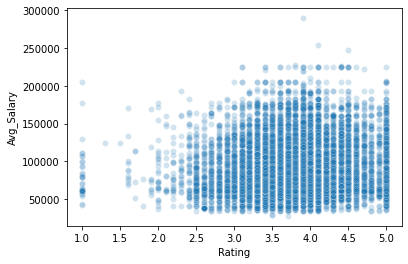

In [13]:
sns.scatterplot(data=original, x='Rating',y='Avg_Salary',alpha=0.2)

`Rating` does not seem to affect the average salary for the position... Let's look at `Size` and `Revenue`:

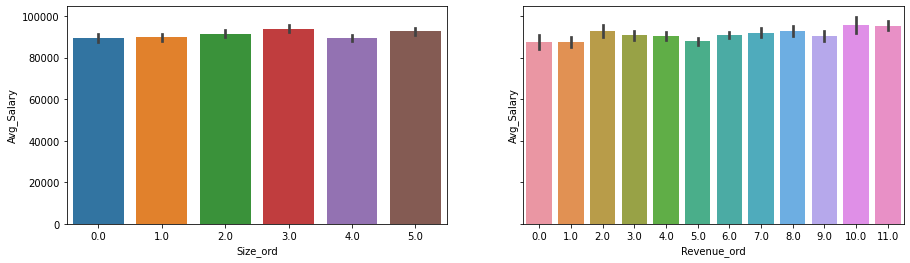

In [14]:
fig, axes = plt.subplots(1,2,figsize=(15,4), sharey=True)
sns.barplot(ax=axes[0],data=data,  y='Avg_Salary', x='Size_ord');
sns.barplot(ax=axes[1],data=data,  y='Avg_Salary', x='Revenue_ord');
plt.show()

`Size` and `Revenue` don't seem to drive the average salary either.

Let's look at sizes:

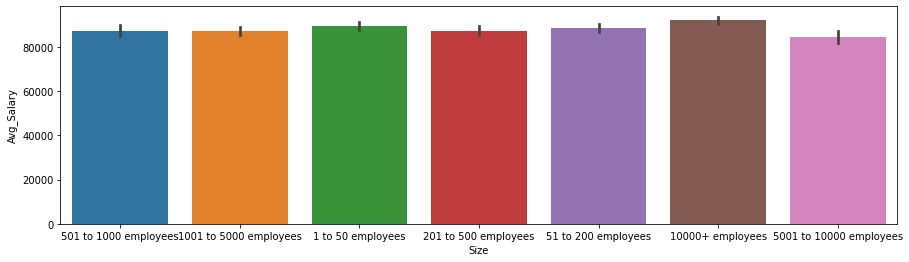

In [15]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,  y='Avg_Salary', x='Size');
plt.show()

Not much of a difference... 10000+ employees companies seem to pay slightly more on average.

What about by sector? 

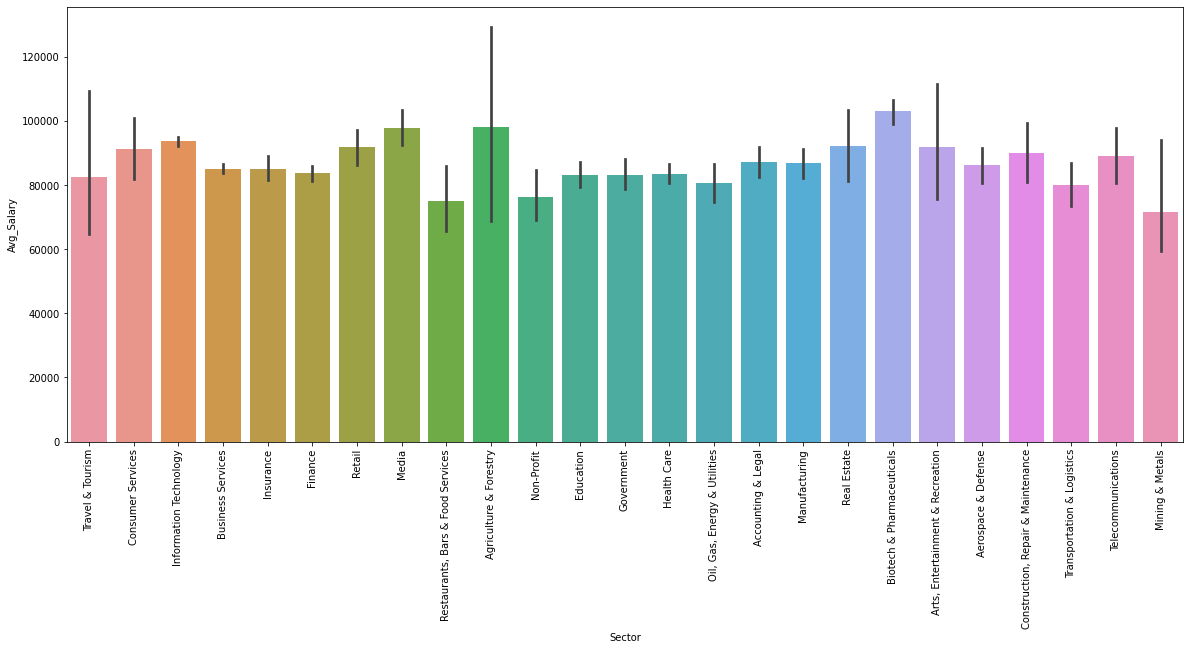

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(data=data,  y='Avg_Salary', x='Sector');
plt.xticks(rotation=90)
plt.show()

Here we see a little more variation. Biotech & Pharmaceuticals, Agriculture & Forestry & Media seem to pay more on average.

Now by states:

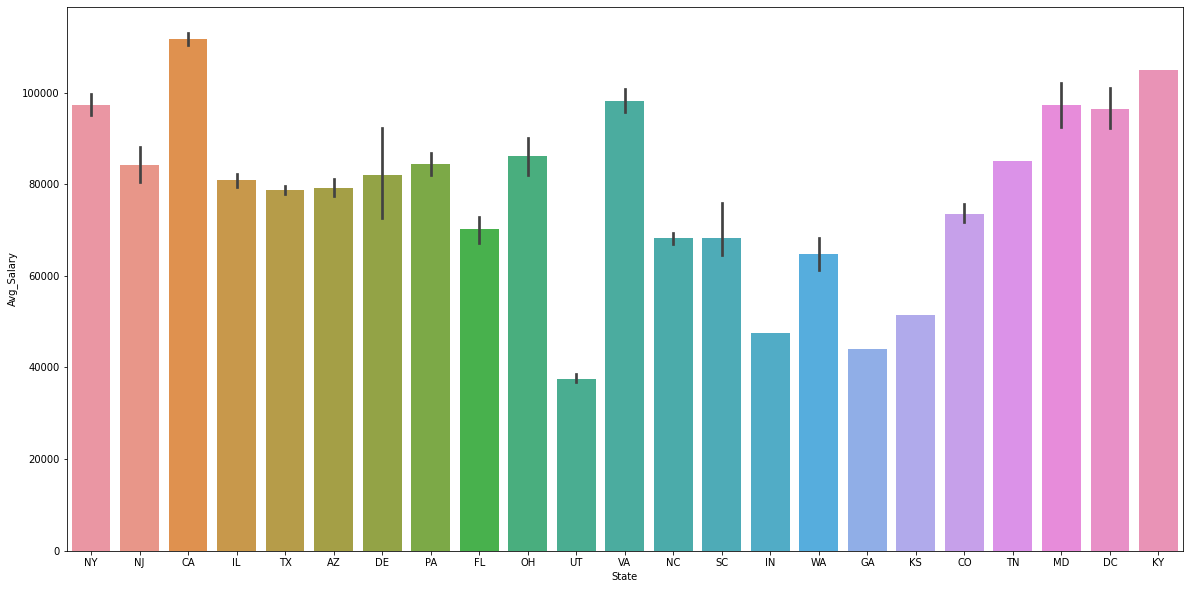

In [17]:
plt.subplots(figsize=(20,10))
sns.barplot(data=original, x='State', y='Avg_Salary')
plt.show()

In [18]:
#original.groupby('State')['Avg_Salary'].mean().sort_values(ascending=False)

On average, the 5 highest paying states are: CA, KY, VA, NY and MD. Contrarywise, UT, GA, IN, KS and WA seem to be the worst paying states... It is not surprise that CA and NY are amongst the better payinh states, but GA being amongst the worst at around $44K a year is very interesting... Maybe they are hiring more Data Analyst than anything else? 

Let's see the number of job postings per job title in each state:

In [19]:
titles = data.iloc[:,23:35].copy()
titles['State'] = data.State

In [20]:
titles.groupby('State').sum()

,Title_Machine,Title_Deep,Title_Analyst,Title_Engineer,Title_Scientist,Title_Manager,Title_Senior,Title_Junior,Title_Lead,Title_Principal,Title_Chief,Title_Intern
State,,,,,,,,,,,,
AZ,5.0,0.0,499.0,110.0,74.0,13.0,109.0,12.0,12.0,7.0,0.0,5.0
CA,131.0,10.0,1894.0,400.0,935.0,76.0,649.0,46.0,62.0,74.0,1.0,16.0
CO,0.0,0.0,96.0,1.0,0.0,0.0,13.0,4.0,3.0,0.0,0.0,0.0
DC,9.0,0.0,9.0,35.0,95.0,1.0,31.0,1.0,3.0,0.0,0.0,0.0
DE,0.0,0.0,48.0,3.0,5.0,3.0,2.0,1.0,6.0,0.0,0.0,0.0
FL,0.0,0.0,50.0,14.0,21.0,2.0,13.0,8.0,3.0,0.0,0.0,0.0
GA,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
IL,12.0,1.0,577.0,85.0,143.0,20.0,139.0,21.0,22.0,6.0,1.0,8.0
IN,0.0,0.0,23.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0


Here we can see that GA has only 6 job postings, 4 of them being for Analysts.

Now let's look at the average salary per tool (Python, R, Scala, etc):

In [21]:
tool = data.iloc[:,17:23].copy()
tool['Avg_Salary'] = data.Avg_Salary
average={}
for column in tool.columns:
    average[column] ={'0': tool.loc[tool[column]==0, 'Avg_Salary'].mean(), '1':tool.loc[tool[column]==1, 'Avg_Salary'].mean()}
pd.DataFrame(average).T

,0,1
R,89415.205745,100260.144686
Python,85064.486582,103465.278959
Julia,91063.650416,109067.885714
SQL,90283.717707,92128.913463
Scala,89352.178309,100724.935284
JavaScript,91191.846532,89349.522026
Avg_Salary,NaN,NaN


In [22]:
tool['State'] = data.State
tool.drop(columns='Avg_Salary').groupby('State').sum().sort_values(by='Python', ascending=False)

,R,Python,Julia,SQL,Scala,JavaScript
State,,,,,,
CA,561.0,1176.0,6.0,1435.0,516.0,116.0
TX,475.0,994.0,11.0,1510.0,569.0,145.0
NY,167.0,401.0,6.0,486.0,121.0,22.0
IL,148.0,305.0,1.0,407.0,122.0,21.0
AZ,74.0,176.0,0.0,330.0,120.0,30.0
VA,85.0,174.0,7.0,138.0,85.0,25.0
PA,108.0,172.0,0.0,309.0,85.0,16.0
OH,45.0,86.0,0.0,94.0,31.0,13.0
DC,40.0,74.0,2.0,60.0,33.0,10.0


Julia and Python seem to have the most positive correlation with average salary. SQL and Scala seem to not make a significant difference. JavaScript is actually negatively correlated... Also, if you know Python, you have better chances of finding a job in CA.

Now, let's run SelectKBest to better understand which variables explain the salary best

In [23]:
df= data.iloc[:,17:].copy()
df.drop('Avg_Salary', axis=1,inplace=True)
df['In_Headquarters'] = data.In_Headquarters
df=df.astype('category')

In [26]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 122 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   R                                   11440 non-null  category
 1   Python                              11440 non-null  category
 2   Julia                               11440 non-null  category
 3   SQL                                 11440 non-null  category
 4   Scala                               11440 non-null  category
 5   JavaScript                          11440 non-null  category
 6   Title_Machine                       11440 non-null  category
 7   Title_Deep                          11440 non-null  category
 8   Title_Analyst                       11440 non-null  category
 9   Title_Engineer                      11440 non-null  category
 10  Title_Scientist                     11440 non-null  category
 11  Title_Manager              

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
features= SelectKBest(f_classif, k=20).fit(df, data.Avg_Salary)

c:\users\ronal\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [23]:
df.columns[features.get_support()]

Index(['Title_Deep', 'Title_Analyst', 'Title_Engineer', 'Title_Scientist',
       'Employer_Estimate', 'AZ', 'CA', 'DC', 'GA', 'IL', 'IN', 'KY', 'MD',
       'NY', 'OH', 'TN', 'TX', 'UT', 'VA', 'WA'],
      dtype='object')

In [33]:
df_company = df.iloc[:,96:121].copy()
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Staffigo Technical Services, LLC  11440 non-null  category
 1   Apple                             11440 non-null  category
 2   Amazon                            11440 non-null  category
 3   Diverse Lynx                      11440 non-null  category
 4   IBM                               11440 non-null  category
 5   Kforce                            11440 non-null  category
 6   Genentech                         11440 non-null  category
 7   Solekai Systems Corp              11440 non-null  category
 8   Lorven Technologies Inc           11440 non-null  category
 9   Facebook                          11440 non-null  category
 10  Apex Systems                      11440 non-null  category
 11  Mondo                             11440 non-null  cate

In [37]:
features_company = SelectKBest(f_classif, k=10).fit(df_company, data.Avg_Salary)
df_company.columns[features_company.get_support()]

c:\users\ronal\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Index(['Apple', 'Amazon', 'Genentech', 'Solekai Systems Corp', 'Facebook',
       'USAA', 'Southwest Research Institute', 'Leidos',
       'Booz Allen Hamilton Inc', 'Guidehouse'],
      dtype='object')

In [35]:
df_city = df.iloc[:,70:96].copy()
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Austin               11440 non-null  category
 1   New York             11440 non-null  category
 2   Chicago              11440 non-null  category
 3   San Diego            11440 non-null  category
 4   Houston              11440 non-null  category
 5   San Antonio          11440 non-null  category
 6   Dallas               11440 non-null  category
 7   Philadelphia         11440 non-null  category
 8   Los Angeles          11440 non-null  category
 9   San Francisco        11440 non-null  category
 10  Phoenix              11440 non-null  category
 11  San Jose             11440 non-null  category
 12  Irving               11440 non-null  category
 13  Columbus             11440 non-null  category
 14  Plano                11440 non-null  category
 15  Tempe              

In [38]:
features_city = SelectKBest(f_classif, k=10).fit(df_city, data.Avg_Salary)
df_city.columns[features_city.get_support()]

c:\users\ronal\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Index(['Austin', 'New York', 'San Diego', 'Houston', 'San Antonio',
       'San Francisco', 'Columbus', 'Washington', 'South San Francisco',
       'Arlington'],
      dtype='object')